# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


Fetching image from: https://picsum.photos/512/512
Image loaded successfully. Shape: (512, 512, 3), Data Type: uint8


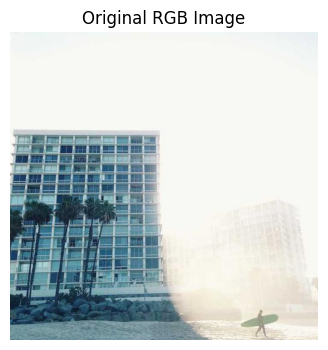

Grayscale image ready. Shape: (512, 512), Data Type: uint8


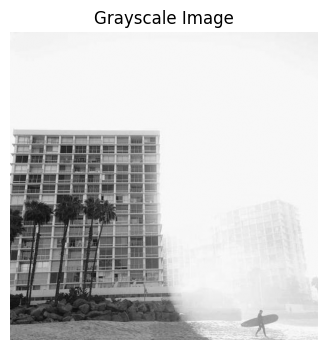

In [99]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64
import requests
import cv2


image_url = 'https://picsum.photos/512/512'
print(f"Fetching image from: {image_url}")

try:
    response = requests.get(image_url)
    if response.status_code == 200:

        img = Image.open(io.BytesIO(response.content))

        img_rgb = np.array(img, dtype=np.uint8)
        print(f"Image loaded successfully. Shape: {img_rgb.shape}, Data Type: {img_rgb.dtype}")
        plt.figure(figsize=(4, 4))
        plt.imshow(img_rgb)
        plt.title('Original RGB Image')
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to fetch image. Status code: {response.status_code}")
except Exception as e:
    print(f"An error occurred during image loading: {e}")


R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]


img_gray_float = (0.299 * R.astype(np.float32) +
                  0.587 * G.astype(np.float32) +
                  0.114 * B.astype(np.float32))


img_gray = img_gray_float.astype(np.uint8)
print(f"Grayscale image ready. Shape: {img_gray.shape}, Data Type: {img_gray.dtype}")


plt.figure(figsize=(4, 4))
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

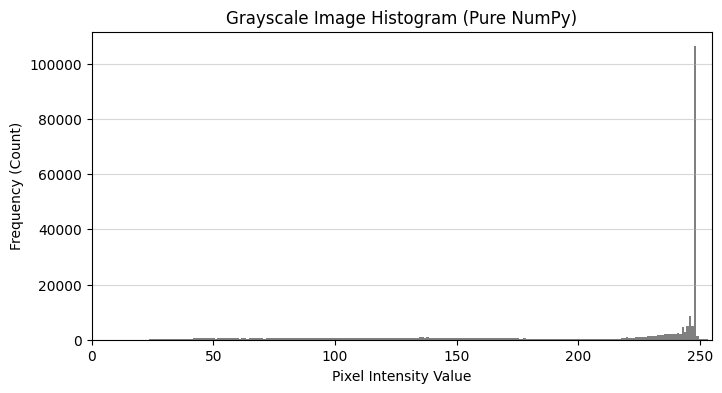

In [100]:
def gray_histogram(gray_img):
    """
    Calculates the histogram of a grayscale image (0-255) using pure NumPy.
    No OpenCV or explicit Python loops are allowed.

    Args:
        gray_img (np.ndarray): A non-normalized grayscale image (values 0-255).

    Returns:
        np.ndarray: A 256-element array representing the histogram counts.
    """

    hist = np.zeros(256, dtype=np.int32)


    flat_img = gray_img.ravel()


    if flat_img.size == 0:
        return hist


    hist_counts = np.bincount(flat_img, minlength=256)


    return hist_counts[:256]


hist_gray = gray_histogram(img_gray)


plt.figure(figsize=(8, 4))

plt.bar(np.arange(256), hist_gray, width=1.0, color='gray')
plt.title('Grayscale Image Histogram (Pure NumPy)')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency (Count)')
plt.xlim([0, 255])
plt.grid(axis='y', alpha=0.5)
plt.show()

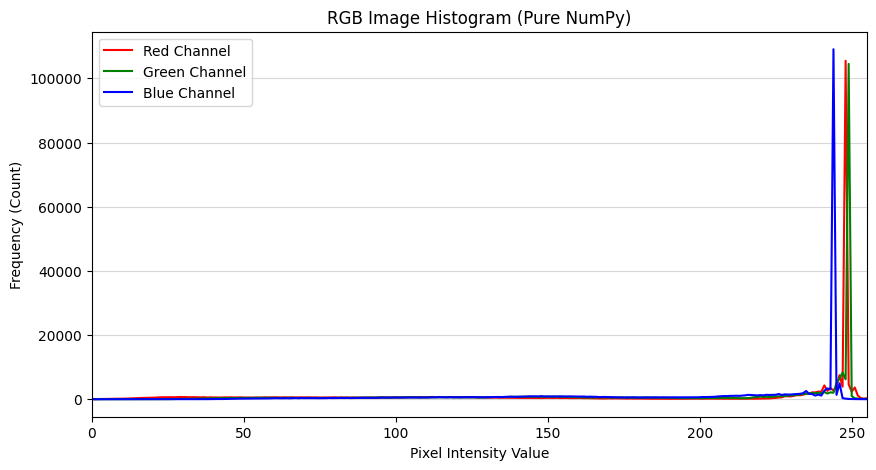

In [101]:
def rgb_histogram(rgb_img):
    """
    Calculates the separate histograms for R, G, and B channels using pure NumPy.

    Args:
        rgb_img (np.ndarray): A non-normalized RGB image (values 0-255, shape HxWx3).

    Returns:
        tuple: A tuple (hist_R, hist_G, hist_B) of 256-element arrays.
    """

    hist_R = np.bincount(rgb_img[:, :, 0].ravel(), minlength=256)[:256]
    hist_G = np.bincount(rgb_img[:, :, 1].ravel(), minlength=256)[:256]
    hist_B = np.bincount(rgb_img[:, :, 2].ravel(), minlength=256)[:256]

    return hist_R, hist_G, hist_B



hist_R, hist_G, hist_B = rgb_histogram(img_rgb)


plt.figure(figsize=(10, 5))
bin_centers = np.arange(256)


plt.plot(bin_centers, hist_R, color='red', label='Red Channel')
plt.plot(bin_centers, hist_G, color='green', label='Green Channel')
plt.plot(bin_centers, hist_B, color='blue', label='Blue Channel')

plt.title('RGB Image Histogram (Pure NumPy)')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency (Count)')
plt.xlim([0, 255])
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

For example, here we download and display a PNG image of the Colab logo:

/tmp/ipython-input-951474841.py:44: RuntimeWarning: invalid value encountered in divide
  H_r = np.where(R_is_max, (G - B) / Delta, 0.0)
/tmp/ipython-input-951474841.py:46: RuntimeWarning: invalid value encountered in divide
  H_g = np.where(G_is_max, 2.0 + (B - R) / Delta, 0.0)
/tmp/ipython-input-951474841.py:48: RuntimeWarning: invalid value encountered in divide
  H_b = np.where(B_is_max, 4.0 + (R - G) / Delta, 0.0)


Custom HSV Image Shape: (512, 512, 3), Data Type: uint8


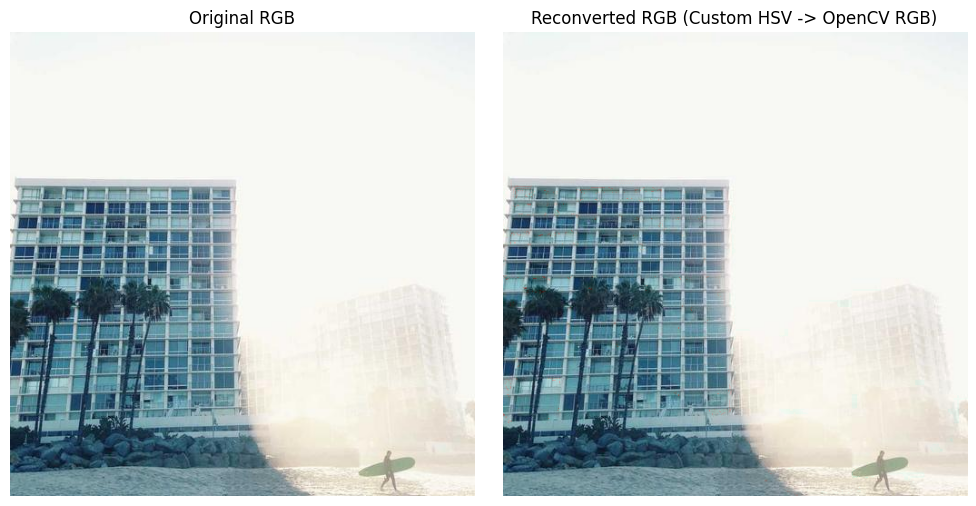

Total pixel difference between original and reconverted RGB: 127072
Verification successful: The reconverted image is very close to the original.


In [102]:
def rgb_to_hsv(img_rgb):
    """
    Converts an RGB image (0-255) to an HSV image (non-normalized, 0-255 H,S,V)
    using pure NumPy and the standard conversion formulas.

    Args:
        img_rgb (np.ndarray): A 0-255 RGB image (HxWx3).

    Returns:
        np.ndarray: The resulting HSV image (HxWx3) with H, S, V components.
    """

    rgb_norm = img_rgb.astype(np.float32) / 255.0
    R, G, B = rgb_norm[:, :, 0], rgb_norm[:, :, 1], rgb_norm[:, :, 2]


    V = np.max(rgb_norm, axis=2)


    Min = np.min(rgb_norm, axis=2) # Find the minimum of R, G, B
    Delta = V - Min


    S = np.zeros_like(V)


    non_zero_V_mask = (V != 0)


    S = np.divide(Delta, V, out=S, where=non_zero_V_mask)


    H = np.zeros_like(V)


    non_zero_delta_mask = (Delta != 0)


    R_is_max = (V == R) & non_zero_delta_mask
    G_is_max = (V == G) & non_zero_delta_mask
    B_is_max = (V == B) & non_zero_delta_mask


    H_r = np.where(R_is_max, (G - B) / Delta, 0.0)

    H_g = np.where(G_is_max, 2.0 + (B - R) / Delta, 0.0)

    H_b = np.where(B_is_max, 4.0 + (R - G) / Delta, 0.0)


    H_prime = H_r + H_g + H_b


    H_degrees = H_prime * 60.0


    H_degrees = np.where(H_degrees < 0, H_degrees + 360.0, H_degrees)



    H_scaled = (H_degrees / 2.0).astype(np.uint8)

    S_scaled = (S * 255.0).astype(np.uint8)

    V_scaled = (V * 255.0).astype(np.uint8)


    hsv_image = np.stack([H_scaled, S_scaled, V_scaled], axis=2)

    return hsv_image


hsv_custom = rgb_to_hsv(img_rgb)
print(f"Custom HSV Image Shape: {hsv_custom.shape}, Data Type: {hsv_custom.dtype}")


rgb_reconverted = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2BGR)

rgb_reconverted = cv2.cvtColor(rgb_reconverted, cv2.COLOR_BGR2RGB)



fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original RGB')
axes[0].axis('off')

axes[1].imshow(rgb_reconverted)
axes[1].set_title('Reconverted RGB (Custom HSV -> OpenCV RGB)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


difference = np.sum(np.abs(img_rgb.astype(np.int32) - rgb_reconverted.astype(np.int32)))
print(f"Total pixel difference between original and reconverted RGB: {difference}")
if difference < img_rgb.size * 5: # A small tolerance
    print("Verification successful: The reconverted image is very close to the original.")
else:
    print("Verification failed: There is a significant difference between original and reconverted image.")

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

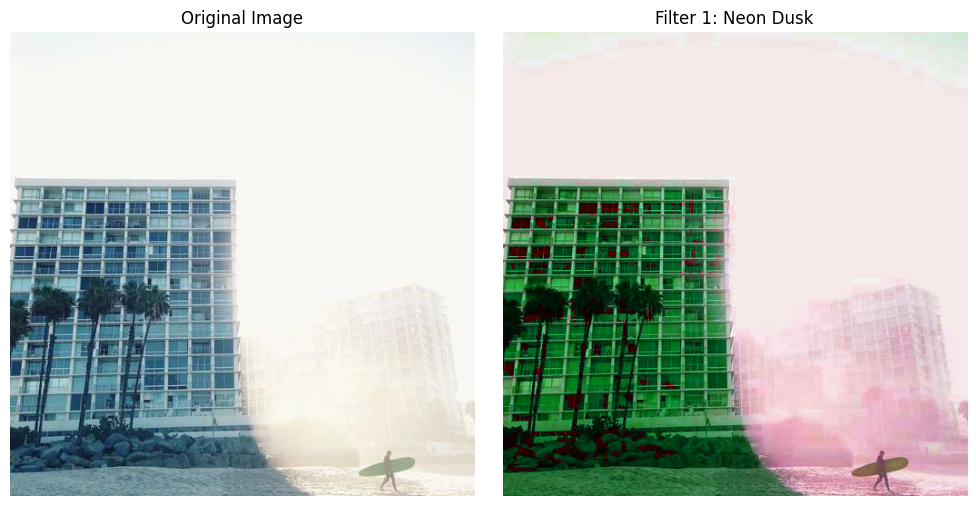

In [103]:
def neon_dusk_filter(img_rgb):
    """
    Applies the 'Neon Dusk' filter: High contrast, vibrance boost, and purple hue shift.

    Args:
        img_rgb (np.ndarray): 0-255 RGB image.

    Returns:
        np.ndarray: Processed 0-255 RGB image.
    """

    img_float = img_rgb.astype(np.float32) / 255.0


    gamma = 0.6
    contrast_adjusted = np.power(img_float, 1.0 / gamma)



    hsv = cv2.cvtColor((contrast_adjusted * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    H, S, V = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]


    hue_shift = 150
    H_shifted = (H + hue_shift) % 180 # H is 0-180 in OpenCV 8-bit


    saturation_scale = 1.6
    S_boosted = S * saturation_scale
    S_boosted = np.clip(S_boosted, 0, 255).astype(np.uint8)


    hsv_processed = np.stack([H_shifted, S_boosted, V], axis=2)


    rgb_final = cv2.cvtColor(hsv_processed, cv2.COLOR_HSV2RGB)

    return rgb_final




img_filter1 = neon_dusk_filter(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_filter1)
axes[1].set_title('Filter 1: Neon Dusk')
axes[1].axis('off')

plt.tight_layout()
plt.show()

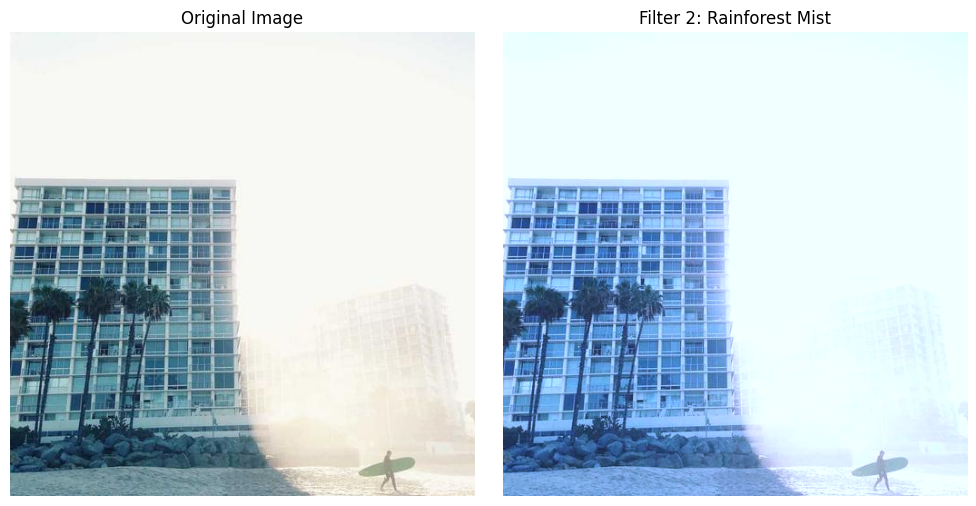

In [104]:
def rainforest_mist_filter(img_rgb):
    """
    Applies the 'Rainforest Mist' filter: Slight brightness increase and a cool blue tint.

    Args:
        img_rgb (np.ndarray): 0-255 RGB image.

    Returns:
        np.ndarray: Processed 0-255 RGB image.
    """

    img_out = img_rgb.astype(np.float32)


    brightness_shift = 20.0
    img_out += brightness_shift


    blue_boost = 1.3

    img_out[:, :, 2] *= blue_boost


    red_reduction = 0.9

    img_out[:, :, 0] *= red_reduction


    img_processed = np.clip(img_out, 0, 255).astype(np.uint8)

    return img_processed


img_filter2 = rainforest_mist_filter(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_filter2)
axes[1].set_title('Filter 2: Rainforest Mist')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

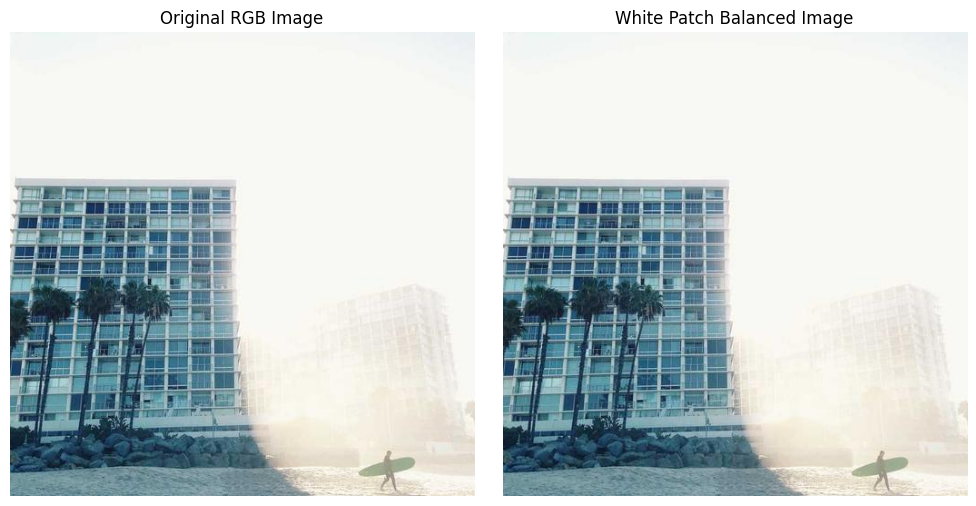

In [105]:
def white_patch_balance(img_rgb):
    """
    Performs White Balance correction using the White Patch Method (also called Max-RGB).
    Uses pure NumPy to find the brightest pixel and scale channels accordingly.

    Args:
        img_rgb (np.ndarray): A 0-255 RGB image (HxWx3).

    Returns:
        np.ndarray: The White Patch Balanced 0-255 RGB image.
    """

    img_float = img_rgb.astype(np.float32)


    max_R = np.max(img_float[:, :, 0])
    max_G = np.max(img_float[:, :, 1])
    max_B = np.max(img_float[:, :, 2])


    V_max = np.max([max_R, max_G, max_B])


    if V_max == 0:
        print("Image is black, skipping white balance.")
        return img_rgb


    R_gain = 255.0 / max_R
    G_gain = 255.0 / max_G
    B_gain = 255.0 / max_B


    img_balanced = np.zeros_like(img_float)


    img_balanced[:, :, 0] = img_float[:, :, 0] * R_gain
    img_balanced[:, :, 1] = img_float[:, :, 1] * G_gain
    img_balanced[:, :, 2] = img_float[:, :, 2] * B_gain


    img_final = np.clip(img_balanced, 0, 255).astype(np.uint8)

    return img_final


img_balanced = white_patch_balance(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_rgb)
axes[0].set_title('Original RGB Image')
axes[0].axis('off')

axes[1].imshow(img_balanced)
axes[1].set_title('White Patch Balanced Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

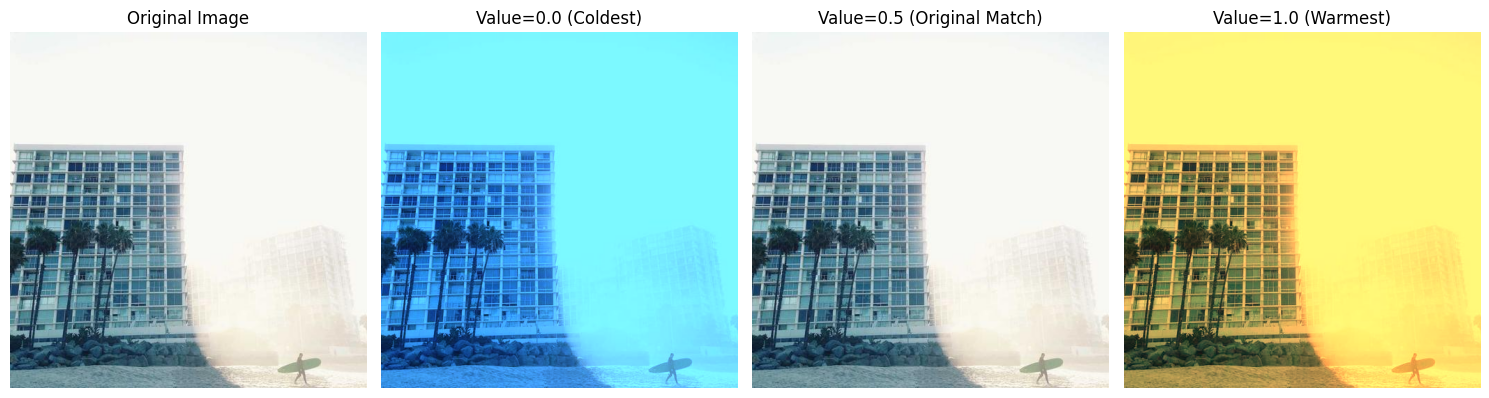

Total pixel difference between original and neutral (value=0.5): 0
Verification successful: The neutral image is a perfect match for the original.


In [106]:
def white_balance(img_rgb, value):
    """
    Adjusts the color temperature of an image based on a slider value.
    Value = 0: Coldest (high blue, low red)
    Value = 0.5: Original image (neutral)
    Value = 1: Warmest (low blue, high red)

    Args:
        img_rgb (np.ndarray): A 0-255 RGB image (HxWx3).
        value (float): A decimal number between 0 and 1.

    Returns:
        np.ndarray: The processed 0-255 RGB image.
    """

    img_float = img_rgb.astype(np.float32)


    scale = 2.0 * (value - 0.5)


    max_scale = 0.5

    R_factor = 1.0 + np.clip(scale, -max_scale, max_scale)
    B_factor = 1.0 - np.clip(scale, -max_scale, max_scale)


    img_processed = np.zeros_like(img_float)


    img_processed[:, :, 0] = img_float[:, :, 0] * R_factor

    img_processed[:, :, 1] = img_float[:, :, 1]

    img_processed[:, :, 2] = img_float[:, :, 2] * B_factor


    img_final = np.clip(img_processed, 0, 255).astype(np.uint8)

    return img_final




value_cold = 0.0
value_neutral = 0.5
value_warm = 1.0


img_cold = white_balance(img_rgb, value_cold)
img_neutral = white_balance(img_rgb, value_neutral)
img_warm = white_balance(img_rgb, value_warm)


fig, axes = plt.subplots(1, 4, figsize=(15, 4))

axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_cold)
axes[1].set_title(f'Value={value_cold} (Coldest)')
axes[1].axis('off')

axes[2].imshow(img_neutral)
axes[2].set_title(f'Value={value_neutral} (Original Match)')
axes[2].axis('off')

axes[3].imshow(img_warm)
axes[3].set_title(f'Value={value_warm} (Warmest)')
axes[3].axis('off')

plt.tight_layout()
plt.show()


difference_neutral = np.sum(np.abs(img_rgb.astype(np.int32) - img_neutral.astype(np.int32)))
print(f"Total pixel difference between original and neutral (value=0.5): {difference_neutral}")
if difference_neutral < img_rgb.size * 1:
    print("Verification successful: The neutral image is a perfect match for the original.")
else:
    print("Verification failed: There is a difference between original and neutral image.")